In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def data_gen(k, b, points_num, percent):
    inliners_points = [(x, k*x+b+np.random.normal()) for x in np.random.uniform(0,10, size=int(points_num*percent))]
    outliners_points = [(x, k*x+b+np.random.normal(scale=5.0)) for x in np.random.uniform(0,10, size=int(points_num*(1-percent)))]
    return np.concatenate([inliners_points, outliners_points])

In [7]:
data = data_gen(3, 0, 100, 0.8)

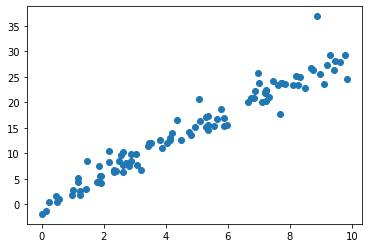

In [8]:
plt.scatter(data[:,0], data[:,1])

In [45]:
def liner_ransac(data, iter_number=100, epsilon=10, inliner_min=10):
    best_score = np.Inf
    for i in range(iter_number):
        indexes = np.random.choice(data.shape[0], 2, replace=False)
        #print(indexes)
        p1, p2 = data[indexes, :]
        
        k = (p2[1]-p1[1])/(p2[0]-p1[0])
        b = p1[1] - p1[0]*k
        
        inliners = []
        error = 0
        
        for p in np.delete(data, indexes, axis=0):
            d = np.linalg.norm(np.cross(p2-p1, p1-p))/np.linalg.norm(p2-p1)
            if d < epsilon:
                inliners.append(p)
                error += d
        
        #print(i, error, len(inliners))
        if len(inliners) < inliner_min:
            continue
        
        if error < best_score:
            best_score = error
            best_params = k, b
            best_inliners = inliners
            
    return (best_score, best_params, best_inliners)

In [46]:
data = data_gen(3,0,100,0.8)
score, params, inliners = liner_ransac(data)
score, params, len(inliners)

(37.56178335006075, (3.0658863856787946, -0.4928462081820939), 97)

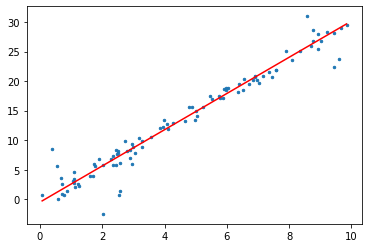

In [50]:
plt.scatter(data[:,0], data[:,1], s=6)
min_var = min(data[:,0])
max_var = max(data[:,0])
k, b = params
plt.plot([min_var, max_var], [k*min_var+b, k*max_var+b], c="r")

---
### ДЗ:
применить рансак алгоритм но не для прямой а для того чтобы оценить параметры эллипса
то есть у нас будет эллипс на плоскости
еще выбросы
и нужно написать тоже что и сегодня только для эллипса

нужно минимум три точки чтобы провести эллипс

+посмотреть как применяют рансак для окружностей

От Vadim Kondarattsev всем:  08:49 PM
https://medium.com/mlearning-ai/ransac-algorithm-for-circles-1e10a5d8617   
посмотреть метод оптимизации Рэнди Буллока

-----
следующее занятие на 1 июня число перенесется

---
где то 8 июня зачет с оценкой

3 июня в 18:15 проверить можем ли, оффлайн

5 июня с утра скорее всего онлайн, мб оффлайн


---
список вопросов есть, но там больше чем мы прошли
препод выкинет оттуда лишнее и пришлет на неделе

заглянуть в книжку яны косолеевой про рансак

ансамблевые методы про них почитать можем
про классические
рандом форест зе буст

1 теор


вопросы + код для небольшой задачи при преподе
+вопрос по алгоритму по примеру